In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
import warnings
from category_encoders import *
import numpy as np
from sklearn.compose import *
from sklearn.impute import *
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [228]:
data=pd.read_csv("BankChurners.csv")

In [229]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [218]:
data.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

In [174]:
X = data[['Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']]

In [175]:
X.drop(columns=['Avg_Open_To_Buy','Months_on_book','Total_Trans_Ct'], inplace=True)

C:\Users\7EIN\AppData\Local\Temp\ipykernel_21684\841360785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Avg_Open_To_Buy','Months_on_book','Total_Trans_Ct'], inplace=True)


In [176]:
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,777,1.335,1144,1.625,0.061,0.000093,0.99991
1,49,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,864,1.541,1291,3.714,0.105,0.000057,0.99994
2,51,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,0,2.594,1887,2.333,0.000,0.000021,0.99998
3,40,F,4,High School,Unknown,Less than $40K,Blue,3,4,1,2517,1.405,1171,2.333,0.760,0.000134,0.99987
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,0,2.175,816,2.500,0.000,0.000022,0.99998


In [177]:
y = data['Credit_Limit']
y = y.values.ravel()
y

array([12691.,  8256.,  3418., ...,  5409.,  5281., 10388.])

In [ ]:
categorical_columns = (X.dtypes == object)
continuous_columns  = (X.dtypes != object)

In [178]:

con_pipe = Pipeline([('scalar', MaxAbsScaler()),
                     ('imputer', SimpleImputer(missing_values=np.nan, strategy='median', add_indicator=True))
                     ])

cat_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore')),
                     ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True))])

preprocessor = ColumnTransformer([('categorical', cat_pipe,  categorical_columns),
                                   ('continuous',  con_pipe,  continuous_columns),
                                   ])
     

In [179]:
X=preprocessor.fit_transform(X)

In [180]:
X.shape

(10127, 35)

#### Separating the entire dataset into train and test

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [124]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor":GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5289.7039
- Mean Absolute Error: 3786.2696
- R2 Score: 0.6627
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5142.3465
- Mean Absolute Error: 3711.5766
- R2 Score: 0.6740


Lasso
Model performance for Training set
- Root Mean Squared Error: 5288.7135
- Mean Absolute Error: 3780.8022
- R2 Score: 0.6628
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5135.5628
- Mean Absolute Error: 3700.8175
- R2 Score: 0.6749


Ridge
Model performance for Training set
- Root Mean Squared Error: 5288.6230
- Mean Absolute Error: 3780.0440
- R2 Score: 0.6628
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5136.1929
- Mean Absolute Error: 3700.0609
- R2 Score: 0.6748


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4799.8843
- Mean Absolute Error: 2997.3847


In [125]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,Gradient Boosting Regressor,0.885160
5,Random Forest Regressor,0.881814
4,Decision Tree,0.785077
7,AdaBoost Regressor,0.741577
1,Lasso,0.674907
2,Ridge,0.674828
0,Linear Regression,0.674048
3,K-Neighbors Regressor,0.575487


In [21]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 67.40


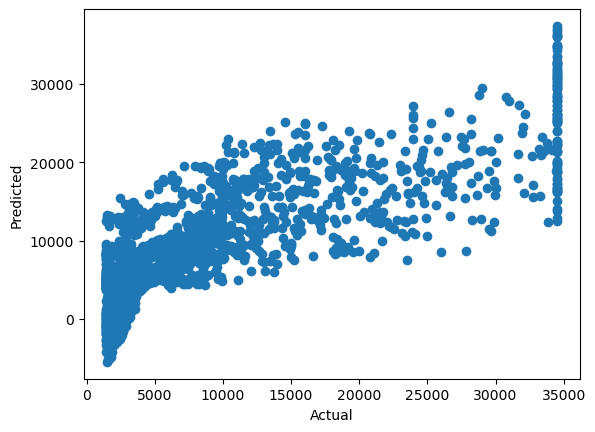

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

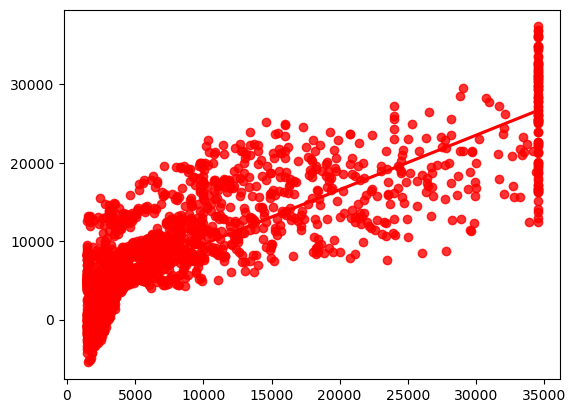

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,16034.0,13840.0,2194.0
1,26021.0,8502.0,17519.0
2,2917.0,1262.0,1655.0
3,3735.0,4320.0,-585.0
4,3068.0,2442.0,626.0
...,...,...,...
2021,3399.0,3912.0,-513.0
2022,2282.0,5544.0,-3262.0
2023,1822.0,-4158.0,5980.0
2024,2526.0,-860.0,3386.0


#### Random Forest Regressor

In [78]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = np.sqrt(mean_squared_error(y_test, predictions))
    print('Model Performance')
    print('MSE of: ', errors)
    
    return errors

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.38


In [98]:
base_accuracy = evaluate(rf, X_test, y_test)

Model Performance
MSE of:  3069.7906934634616


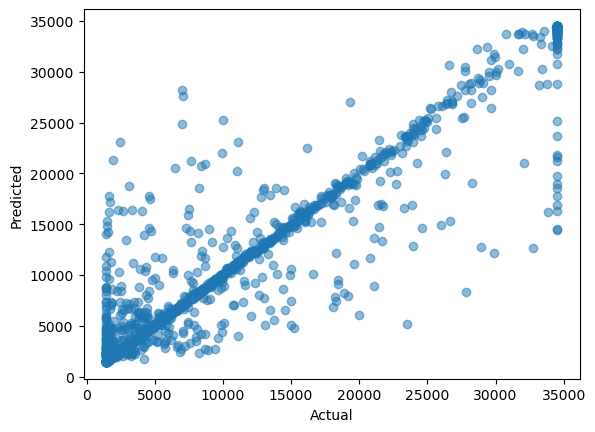

In [100]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

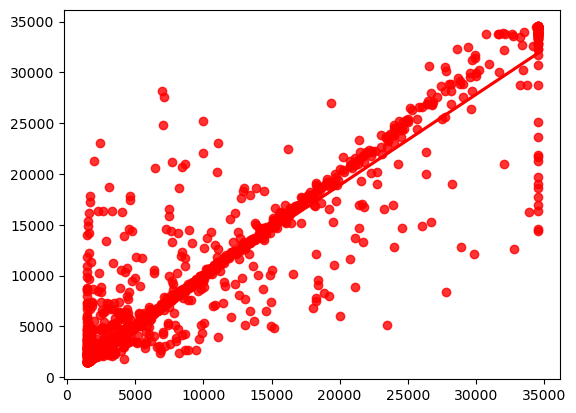

In [101]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [103]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,16034.0,15920.940,113.060
1,26021.0,11134.603,14886.397
2,2917.0,2916.950,0.050
3,3735.0,3732.080,2.920
4,3068.0,3082.030,-14.030
...,...,...,...
2021,3399.0,3409.140,-10.140
2022,2282.0,3193.676,-911.676
2023,1822.0,1821.370,0.630
2024,2526.0,2538.790,-12.790


In [54]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


#### Hyper-Parameter Tuning 

#### According to the documentation on random forest, it seems the following are the most important settings:
* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [104]:
n_estimators =[10,50,70,100,120]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 25, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 25, 100],
 'n_estimators': [10, 50, 70, 100, 120]}


In [105]:
random_rfr=RandomizedSearchCV(estimator=rf, param_distributions=random_grid,n_iter = 10, cv = 5, verbose=2, random_state=0)

In [106]:
random_rfr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=120; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=120; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=120; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=120; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=120; total time=   1.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=120; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=120; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estima

C:\Users\7EIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\7EIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\7EIN\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\7EIN\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\7EIN\anaconda3\lib\site-packages\sklea

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 25,
                                                              100],
                                        'n_estimators': [10, 50, 70, 100, 120]},
                   random_state=0, verbose=2)

In [107]:
random_accuracy = evaluate(random_rfr, X_test, y_test)

Model Performance
MSE of:  3651.5190001553387


In [108]:
random_rfr.best_params_

{'n_estimators': 120,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [109]:
y_pred=random_rfr.predict(X_test)

In [110]:
random_rfr.score(X_test,y_test)

0.835646761927635

In [111]:
random_pred=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
random_pred

,Actual Value,Predicted Value,Difference
0,16034.0,16783.235505,-749.235505
1,26021.0,9938.615562,16082.384438
2,2917.0,2871.985853,45.014147
3,3735.0,4395.942723,-660.942723
4,3068.0,3010.304134,57.695866
...,...,...,...
2021,3399.0,4035.498916,-636.498916
2022,2282.0,3199.514876,-917.514876
2023,1822.0,2710.021705,-888.021705
2024,2526.0,2681.570100,-155.570100


###### Since the Base model Accuracy has a lower MSE compared to the Random Accuracy , the model without hyperparameter tuning performs better based on the MSE metric. Lower MSE values indicate better accuracy in regression models. 

#### Gradient Boosting Regressor

In [129]:
gb_reg=GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
gb_y=gb_reg.predict(X_test)
score = r2_score(y_test, gb_y)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.52


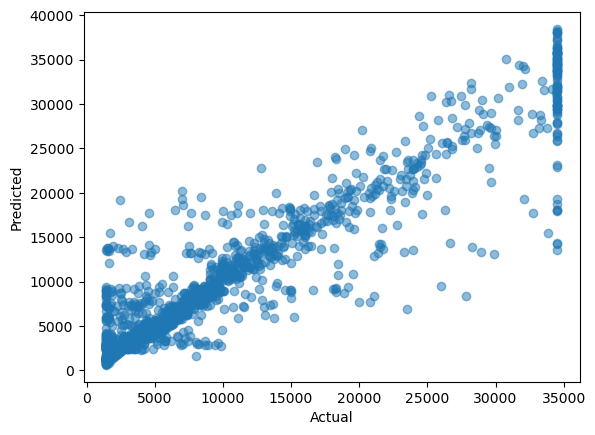

In [130]:
plt.scatter(y_test, gb_y, alpha = 0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

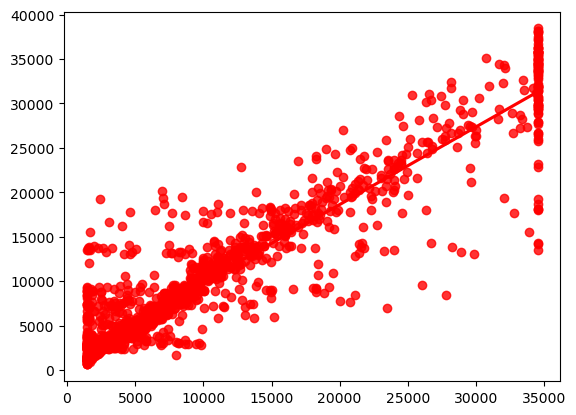

In [131]:
sns.regplot(x=y_test,y=gb_y,ci=None,color ='red');

In [133]:
cross_val_score(GradientBoostingRegressor(),X_train,y_train)

array([0.8752171 , 0.86933442, 0.89072597, 0.86905431, 0.87946365])

In [134]:
cross_val_score(rf,X_train,y_train)

array([0.88157043, 0.86556904, 0.89116446, 0.86229182, 0.87777796])

### Predicting New Data

In [230]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [232]:
y=data['Credit_Limit']
y

0        12691.0
1         8256.0
2         3418.0
3         3313.0
4         4716.0
          ...   
10122     4003.0
10123     4277.0
10124     5409.0
10125     5281.0
10126    10388.0
Name: Credit_Limit, Length: 10127, dtype: float64

In [233]:
data.drop(columns=['Avg_Open_To_Buy','CLIENTNUM','Months_on_book','Total_Trans_Ct','Credit_Limit','Attrition_Flag'], inplace=True)

In [234]:
categorical_columns = (data.dtypes == object)
continuous_columns  = (data.dtypes != object)

In [235]:
con_pipe = Pipeline([('scalar', MaxAbsScaler()),
                     ('imputer', SimpleImputer(missing_values=np.nan, strategy='median', add_indicator=True))
                     ])

cat_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore')),
                     ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True))])

preprocessor = ColumnTransformer([('categorical', cat_pipe,  categorical_columns),
                                   ('continuous',  con_pipe,  continuous_columns),
                                   ])
     

In [236]:
data=preprocessor.fit_transform(data)

In [237]:
data[0]

array([0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.16438356e-01,
       6.00000000e-01, 8.33333333e-01, 1.66666667e-01, 5.00000000e-01,
       3.08700834e-01, 3.92993818e-01, 6.18913655e-02, 4.37533656e-01,
       6.10610611e-02, 9.34872647e-05, 9.99919999e-01])

In [238]:
data[0].shape

(35,)

In [239]:
data[0].reshape(1,-1).shape

(1, 35)

In [240]:
rf.predict((data[0].reshape(1,-1)))

array([12871.5])

In [241]:
y[0]

12691.0